# Decision Tree Models for Regression

## Objectives

- Explore the application of decision tree models for regression tasks.
- Understand how tree depth and splitting criteria impact model performance.
- Evaluate model effectiveness using R² and RMSE metrics.

## Background

Decision trees for regression predict continuous values by learning decision rules derived from features. They are advantageous for their interpretability and ability to handle non-linear relationships.

## Datasets Used

- Synthetic Dataset: Created to demonstrate basic decision tree functionality with a clear, controlled set of data.

- Advertising Dataset: Examines the relationship between advertising budgets across different media and sales performance.

## Introduction

A regression tree is a decision tree used for regression. It is used to predict continuous values instead of discrete outputs.

In [1]:
import numpy as np 
np.random.seed(50) 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.figsize":(6, 4)})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn import tree

## Understanding Regression Trees

Let's start by generating some data.

### Generating Data

In [3]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 1.3, 1.2, 1.8, 2, 4.5, 4.7, 5.2, 5.6, 5])
df0 = pd.DataFrame({'X':X , 'y':y})
df0.head()

,X,y
0,1,1.0
1,2,1.3
2,3,1.2
3,4,1.8
4,5,2.0


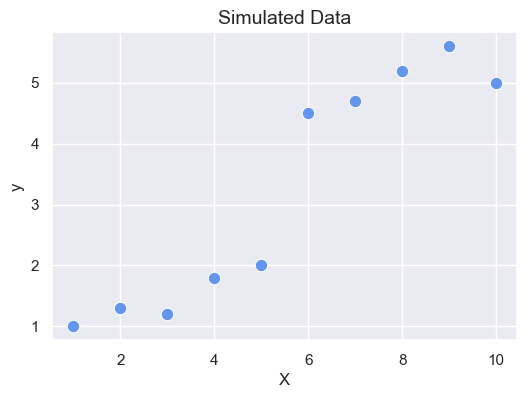

In [4]:
sns.scatterplot(x=df0.X, y=df0.y, s=80, 
            color='cornflowerblue').set_title("Simulated Data", fontsize=14); 

In [5]:
# Splitting the sample into training and testing sets
X_train0, X_test0, y_train0, y_test0=train_test_split(df0.X, df0.y, test_size=0.30, random_state=10)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train0.shape[0], X_test0.shape[0])) 

Train Set: 7 cases, 	Test Set: 3 cases


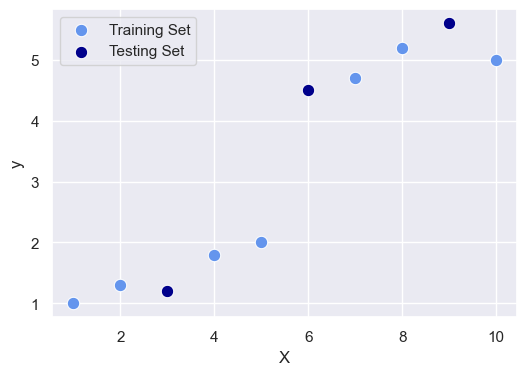

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train0, y=y_train0, s=80, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=X_test0,  y=y_test0,  s=80, color='darkblue',       label='Testing Set');  

In [7]:
# Saving training and testing data
data_train0 = pd.concat([X_train0, y_train0], axis=1)
data_test0  = pd.concat([X_test0,  y_test0],  axis=1)

In [8]:
# Defining the variables for training the model
X=data_train0.X.values.reshape(-1,1)
y=data_train0.y.values

### Regression Tree Model with a maximum depth of 1 

In [9]:
# Initializing a simple model with a maximum depth of 1
regressor0 = tree.DecisionTreeRegressor(random_state=0, max_depth=1) 
regressor0.fit(X, y)        # Fit the model
regressor0.score(X, y)      # Getting the score
print('Score = %.3f' %regressor0.score(X_test0.values.reshape(-1,1), y_test0))

Score = 0.108


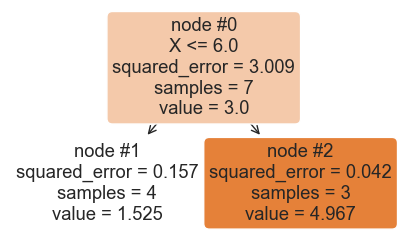

In [10]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(5, 3))
tree.plot_tree( regressor0,
                feature_names=['X'],
                filled=True,
                node_ids=True,
                rounded=True                 
                );

The Regression Tree algorithm computes the mean square error. It measures how much the model predictions deviate from the original target, that is, the amount of error in the model. 

- **node #0**: 
    - squared_error = 3.009, 
    - sample = 7 (all training cases)
    - value = 3.0 It is the average of the `y` of the 7 training cases  
    - The sample is split in two according to X < 6.0

- **node #1**: 
    - squared_error = 0.157, (Notice that it is lesser than the squared_error of the parent node)
    - sample = 4 
    - value = 1.525 It is the average of the `y` of the 4 training cases of the node 

- **node #3**: 
    - squared_error = 0.042, (Notice that it is lesser than the squared_error of the parent node)
    - sample = 3 
    - value = 4.967 It is the average of the `y` of the 3 training cases of the node 


In [11]:
# Print Text Representation of tree
text_tree = tree.export_text(regressor0)
print(text_tree)

|--- feature_0 <= 6.00
|   |--- value: [1.52]
|--- feature_0 >  6.00
|   |--- value: [4.97]



In [12]:
# Prediction with training and testing cases
data_train0['y_pred0'] = regressor0.predict(data_train0.X.values.reshape(-1,1))
data_test0['y_pred0']  = regressor0.predict(data_test0.X.values.reshape(-1,1))
data_test0.head()

,X,y,y_pred0
8,9,5.6,4.966667
2,3,1.2,1.525000
5,6,4.5,1.525000


In [13]:
# Computing R²
print('Regression Tree (max_depth=1) Training Set R² = %.3f' %(r2_score(data_train0.y, data_train0.y_pred0)))
print('Regression Tree (max_depth=1) Testing  Set R² = %.3f' %(r2_score(data_test0.y, data_test0.y_pred0)))

Regression Tree (max_depth=1) Training Set R² = 0.964
Regression Tree (max_depth=1) Testing  Set R² = 0.108


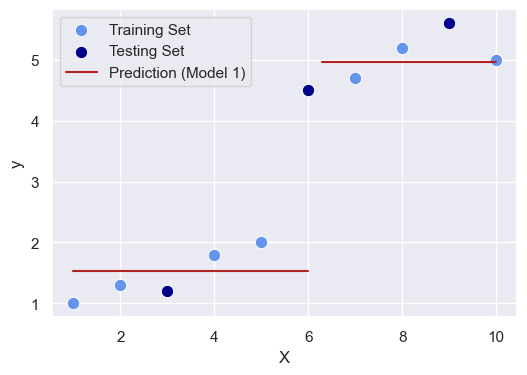

In [14]:
# Plotting the results
sns.scatterplot(x=data_train0.X, y=data_train0.y, s=80, color='cornflowerblue', label='Training Set')
sns.scatterplot(x=data_test0.X, y=data_test0.y, s=80, color='darkblue', label='Testing Set')
sns.lineplot(x=[1,6], y=[1.525, 1.525], color='firebrick')                                      # node#1
sns.lineplot(x=[6.3,10], y=[4.967, 4.967], color='firebrick', label='Prediction (Model 1)');    # node#2

### Regression Tree Model with a maximum depth of 2 

In [15]:
# Initialize and fit the model
regressor1 = tree.DecisionTreeRegressor(random_state=0, max_depth=2) 
regressor1.fit(X, y) 
print('Score = %.3f' %regressor1.score(X_test0.values.reshape(-1,1), y_test0))

Score = 0.331


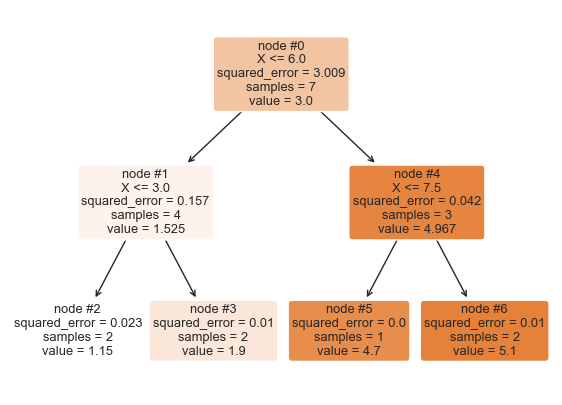

In [16]:
# Plotting the tree model
fig = plt.figure(figsize=(7, 5))
tree.plot_tree( regressor1,
                feature_names=['X'],
                filled=True,
                node_ids=True,
                rounded=True                 
                );

Let's analyze the leaf nodes. Remember, we are using only 7 cases to build the tree, which is a small sample size.

- **node #2**: 
    - squared_error = 0.023, 
    - samples = 2 
    - value = 1.15 It is the predicted value of `y` for X <= 3.0    

- **node #3**: 
    - squared_error = 0.01, 
    - samples = 2 
    - value = 1.9 It is the predicted value of `y` for 3.0 < X < 6.0

- **node #5**: 
    - squared_error = 0.0, (The squared error is pretty small)
    - sample = 1 
    - value = 4.7 It is the predicted value of `y` for 6.0 < X <= 7.5 

- **node #6**: 
    - squared_error = 0.01
    - samples = 2 
    - value = 5.1 It is the predicted value of `y` for X > 7.5 

In [17]:
# Prediction with training and testing cases
data_train0['y_pred1']=regressor1.predict(data_train0.X.values.reshape(-1,1))
data_test0['y_pred1']=regressor1.predict(data_test0.X.values.reshape(-1,1))
data_test0.head()

,X,y,y_pred0,y_pred1
8,9,5.6,4.966667,5.10
2,3,1.2,1.525000,1.15
5,6,4.5,1.525000,1.90


In [18]:
# Computing R²
print('Regression Tree (max_depth=2) Training Set R² = %.3f' %(r2_score(data_train0.y, data_train0.y_pred1)))
print('Regression Tree (max_depth=2) Testing Set  R² = %.3f' %(r2_score(data_test0.y, data_test0.y_pred1)))

Regression Tree (max_depth=2) Training Set R² = 0.996
Regression Tree (max_depth=2) Testing Set  R² = 0.331


`R2` behaves good in the training set, but bad in the testing set. That means the model does not generalize well. Remember, we are working with a small sample just for you to understand how the tree model works.

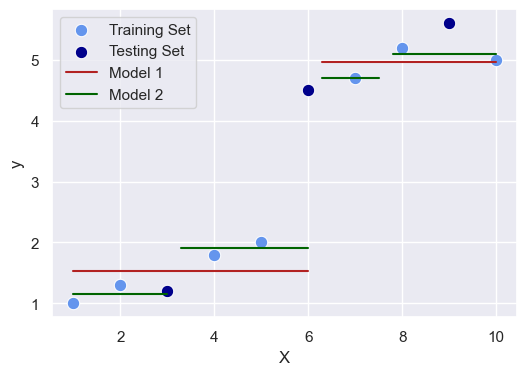

In [19]:
# Plotting the results
sns.scatterplot(x=data_train0.X, y=data_train0.y, s=80, color='cornflowerblue', label='Training Set')  # Training data
sns.scatterplot(x=data_test0.X, y=data_test0.y, s=80, color='darkblue', label='Testing Set')           # Test data
sns.lineplot(x=[1,6],     y=[1.525, 1.525], color='firebrick')                          # node#1 Model 1
sns.lineplot(x=[6.3,10],  y=[4.967, 4.967], color='firebrick', label='Model 1');        # node#2 Model 1
sns.lineplot(x=[1,3],     y=[1.15, 1.15],   color='darkgreen')                          # node#2 Model 2
sns.lineplot(x=[3.3,6],   y=[1.9, 1.9],     color='darkgreen')                          # node#3 Model 2
sns.lineplot(x=[6.3,7.5], y=[4.7, 4.7],     color='darkgreen')                          # node#5 Model 2
sns.lineplot(x=[7.8,10],  y=[5.1, 5.1],     color='darkgreen', label='Model 2');        # node#6 Model 2

As you can see, Model 2 is better than Model 1!

## Advertising Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [20]:
# Getting data
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Descriptive Statistics

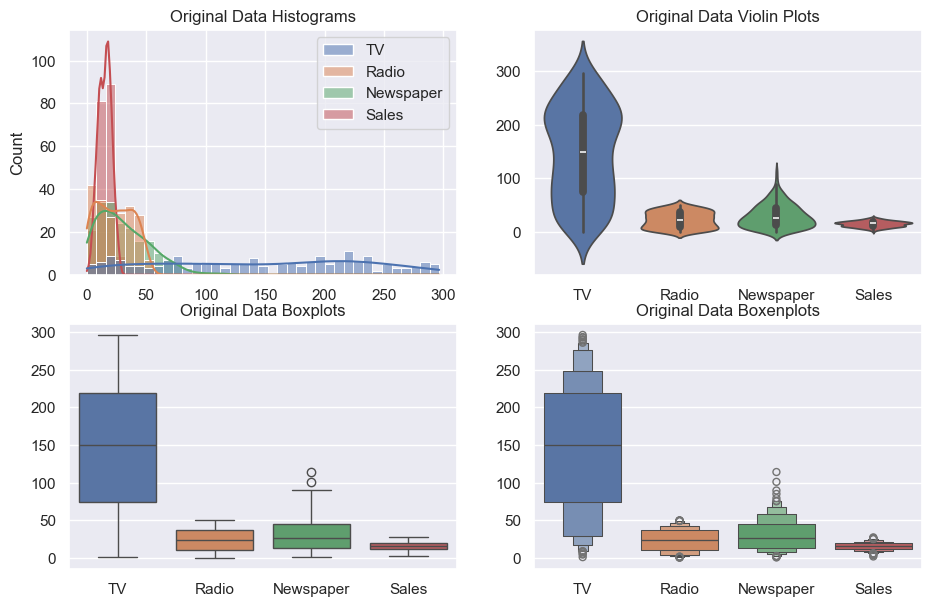

In [21]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = df, kde=True).set(title="Original Data Histograms")

plt.subplot(222)
sns.violinplot(data = df).set(title="Original Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = df).set(title="Original Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = df).set(title="Original Data Boxenplots");

## Simple Regression Tree Models

In [22]:
# Features matrix
X = df[['TV']]
# Target variable
y = df.Sales
# Splitting the sample into train and test sets.
X_train1, X_test1, y_train1, y_test1=train_test_split(X, y, test_size=0.30, random_state=20)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train1.shape[0], X_test1.shape[0])) 
data_train1 = pd.concat([X_train1, y_train1], axis=1)
data_test1 = pd.concat([X_test1, y_test1], axis=1)

Train Set: 140 cases, 	Test Set: 60 cases


### Using maximum depth parameter

In [23]:
# Initialize and fit the model
regressor2 = tree.DecisionTreeRegressor(random_state=0, max_depth=2) 
regressor2.fit(X_train1, y_train1)
data_train1['y_pred2']=regressor2.predict(X_train1)
data_test1['y_pred2']=regressor2.predict(X_test1)
data_test1.head()

,TV,Sales,y_pred2
150,280.7,16.1,22.158333
28,248.8,18.9,18.861404
13,97.5,13.7,12.214035
178,276.7,16.8,22.158333
109,255.4,19.8,18.861404


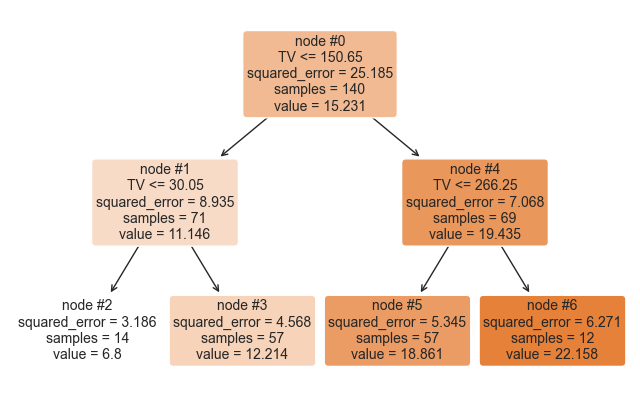

In [24]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(8,5))
tree.plot_tree( regressor2,
                feature_names=X_train1.columns,
                node_ids=True,
                filled=True,                
                rounded=True,                 
                );

### Using the parameter minimum number of samples for splitting

The node stops splitting if it has less than a predefined minimum number of samples. (`min_samples_split`, default=2)

Let's use `min_samples_split = 70`.

In [25]:
# Initialize and fit the model
regressor3 = tree.DecisionTreeRegressor(random_state=0, min_samples_split=70) 
regressor3.fit(X_train1, y_train1)
data_train1['y_pred3']=regressor3.predict(X_train1)
data_test1['y_pred3']=regressor3.predict(X_test1)
data_test1.head()

,TV,Sales,y_pred2,y_pred3
150,280.7,16.1,22.158333,19.434783
28,248.8,18.9,18.861404,19.434783
13,97.5,13.7,12.214035,12.214035
178,276.7,16.8,22.158333,19.434783
109,255.4,19.8,18.861404,19.434783


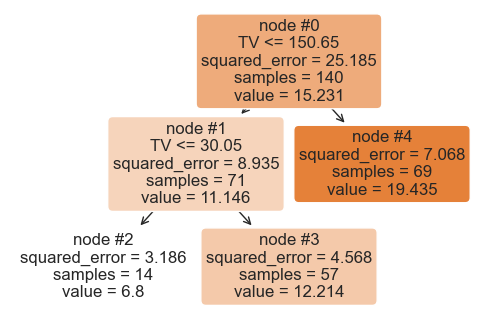

In [26]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(6,4))
tree.plot_tree( regressor3,
                feature_names=X_train1.columns,
                node_ids=True,
                filled=True,                
                rounded=True,                 
                );

Notice we got a different tree. `node #4` has 69 observations, so it did not split.

### Using the parameter minimum number of samples in the leaf nodes

The node will split if its leaf nodes reach the minimum number of samples required. (min_samples_leaf, default=1)

We will get a decision tree with at least 15 cases per leaf node.

In [27]:
# Initialize and fit the model
regressor4 = tree.DecisionTreeRegressor(random_state=0, min_samples_leaf=15) 
regressor4.fit(X_train1, y_train1)
data_train1['y_pred4']=regressor4.predict(X_train1)
data_test1['y_pred4']=regressor4.predict(X_test1)
data_test1.head()

,TV,Sales,y_pred2,y_pred3,y_pred4
150,280.7,16.1,22.158333,19.434783,21.366667
28,248.8,18.9,18.861404,19.434783,21.366667
13,97.5,13.7,12.214035,12.214035,13.333333
178,276.7,16.8,22.158333,19.434783,21.366667
109,255.4,19.8,18.861404,19.434783,21.366667


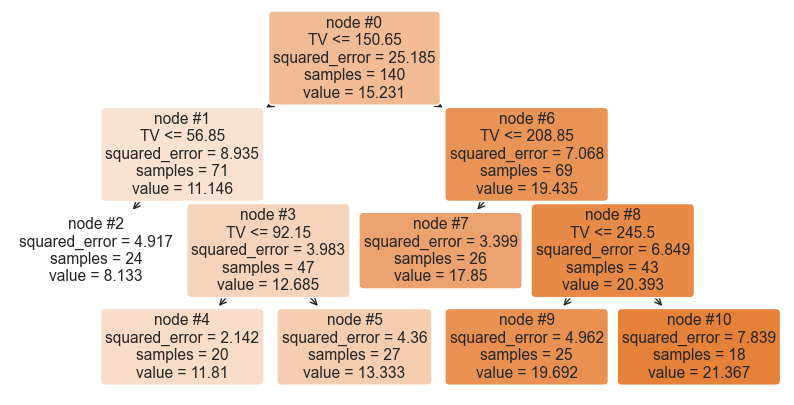

In [28]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10,5))
tree.plot_tree( regressor4,
                feature_names=X_train1.columns,
                node_ids=True,
                filled=True,                
                rounded=True,                 
                );

Notice all leaf nodes have samples >= 15.

### Model comparisons

We have predictions for the three models. Let's use them!

In [29]:
# We have predictions for the three models
data_train1.head()

,TV,Sales,y_pred2,y_pred3,y_pred4
134,36.9,10.8,12.214035,12.214035,8.133333
62,239.3,20.7,18.861404,19.434783,19.692000
20,218.4,18.0,18.861404,19.434783,19.692000
21,237.4,17.5,18.861404,19.434783,19.692000
45,175.1,16.1,18.861404,19.434783,17.850000


In [30]:
# Computing R² on Training Sets
print('Regression Tree --- Training Set ---   ')
print('Sales-TV (max_depth=2)          R² = %.3f' %(r2_score(data_train1.Sales, data_train1.y_pred2)))
print('Sales-TV (min_samples_split=70) R² = %.3f' %(r2_score(data_train1.Sales, data_train1.y_pred3)))
print('Sales-TV (min_samples_leaf=15)  R² = %.3f' %(r2_score(data_train1.Sales, data_train1.y_pred4)))

Regression Tree --- Training Set ---   
Sales-TV (max_depth=2)          R² = 0.806
Sales-TV (min_samples_split=70) R² = 0.775
Sales-TV (min_samples_leaf=15)  R² = 0.821


In [31]:
# Computing R² on Testing Sets
print('Regression Tree --- Testing Set ---   ')
print('Sales-TV (max_depth=2)          R² = %.3f' %(r2_score(data_test1.Sales, data_test1.y_pred2)))
print('Sales-TV (min_samples_split=70) R² = %.3f' %(r2_score(data_test1.Sales, data_test1.y_pred3)))
print('Sales-TV (min_samples_leaf=15)  R² = %.3f' %(r2_score(data_test1.Sales, data_test1.y_pred4)))

Regression Tree --- Testing Set ---   
Sales-TV (max_depth=2)          R² = 0.786
Sales-TV (min_samples_split=70) R² = 0.782
Sales-TV (min_samples_leaf=15)  R² = 0.786


In [32]:
# Computing RMSE on Training Sets
print('Regression Tree --- Training Set ---   ')
print('Sales-TV (max_depth=2)          RMSE = %.3f' 
      %(root_mean_squared_error(data_train1.Sales, data_train1.y_pred2)))
print('Sales-TV (min_samples_split=70) RMSE = %.3f' 
      %(root_mean_squared_error(data_train1.Sales, data_train1.y_pred3)))
print('Sales-TV (min_samples_leaf=15)  RMSE = %.3f' 
      %(root_mean_squared_error(data_train1.Sales, data_train1.y_pred4)))

Regression Tree --- Training Set ---   
Sales-TV (max_depth=2)          RMSE = 2.212
Sales-TV (min_samples_split=70) RMSE = 2.379
Sales-TV (min_samples_leaf=15)  RMSE = 2.125


In [33]:
# Computing RMSE on Testing Sets
print('Regression Tree --- Testing Set ---   ')
print('Sales-TV (max_depth=2)          RMSE = %.3f' 
      %(root_mean_squared_error(data_test1.Sales, data_test1.y_pred2)))
print('Sales-TV (min_samples_split=70) RMSE = %.3f' 
      %(root_mean_squared_error(data_test1.Sales, data_test1.y_pred3)))
print('Sales-TV (min_samples_leaf=15)  RMSE = %.3f' 
      %(root_mean_squared_error(data_test1.Sales, data_test1.y_pred4)))

Regression Tree --- Testing Set ---   
Sales-TV (max_depth=2)          RMSE = 2.688
Sales-TV (min_samples_split=70) RMSE = 2.713
Sales-TV (min_samples_leaf=15)  RMSE = 2.685


Remember, the lower the RMSE, the better a model fits the data. 

## Multiple Regression Tree Model

Let's create a more complicated model. The feature matrix will now be composed of three variables: `TV`, `Radio`, and `Newspaper`. Notice that the graphical representation is not an option anymore.

In [34]:
# Features matrix
X2 = df[['TV','Radio','Newspaper']]
# Target variable
y = df.Sales

In [35]:
# Splitting the sample into train and test sets.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=20)
print('Train Set: %i cases, \tTest Set: %i cases' %(X_train2.shape[0], X_test2.shape[0])) 
data_train2 = pd.concat([X_train2, y_train2], axis=1)
data_test2  = pd.concat([X_test2, y_test2],   axis=1)

Train Set: 140 cases, 	Test Set: 60 cases


### Regression Tree Model A 

We will create a regression tree model with at least 20 observations in each leaf node.

In [36]:
regressorA = tree.DecisionTreeRegressor(random_state=0, min_samples_leaf=20) 
regressorA.fit(X_train2, y_train2)
print('    R² = %.3f' %regressorA.score(X_test2, y_test2))

    R² = 0.857


In [37]:
# Prediction 
data_train2['y_predA']=regressorA.predict(X_train2)
data_test2['y_predA']=regressorA.predict(X_test2)
data_test2.head()

,TV,Radio,Newspaper,Sales,y_predA
150,280.7,13.9,37.0,16.1,19.1375
28,248.8,27.1,22.9,18.9,19.1375
13,97.5,7.6,7.2,13.7,11.3680
178,276.7,2.3,23.7,16.8,19.1375
109,255.4,26.9,5.5,19.8,19.1375


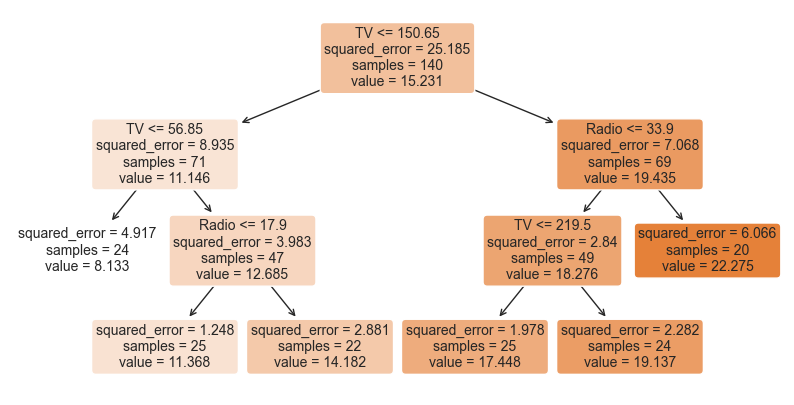

In [38]:
# Plot Tree with plot_tree
fig = plt.figure(figsize=(10,5))
tree.plot_tree( regressorA,
                feature_names=X_train2.columns,
                filled=True,                
                rounded=True,                 
                );

We can set `proportion=True`. When set it to True, change the display of `samples` to be percentages.

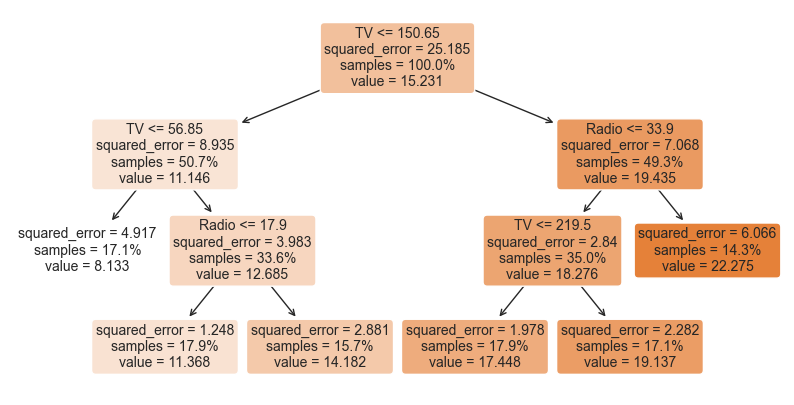

In [39]:
# Including proportion=True
fig = plt.figure(figsize=(10,5))
tree.plot_tree( regressorA,
                feature_names=X_train2.columns,
                proportion=True,
                filled=True,                
                rounded=True,                 
                );

### Regression Tree Model B

We will create a regression tree model that considers split nodes with more than 50 observations.

In [40]:
regressorB = tree.DecisionTreeRegressor(random_state=0, min_samples_split=50) 
regressorB.fit(X_train2, y_train2)
print('    R² = %.3f' %regressorB.score(X_test2, y_test2))

    R² = 0.871


In [41]:
# Prediction 
data_train2['y_predB']=regressorB.predict(X_train2)
data_test2['y_predB'] =regressorB.predict(X_test2)
data_test2.head()

,TV,Radio,Newspaper,Sales,y_predA,y_predB
150,280.7,13.9,37.0,16.1,19.1375,19.075758
28,248.8,27.1,22.9,18.9,19.1375,19.075758
13,97.5,7.6,7.2,13.7,11.3680,11.259459
178,276.7,2.3,23.7,16.8,19.1375,16.994444
109,255.4,26.9,5.5,19.8,19.1375,19.075758


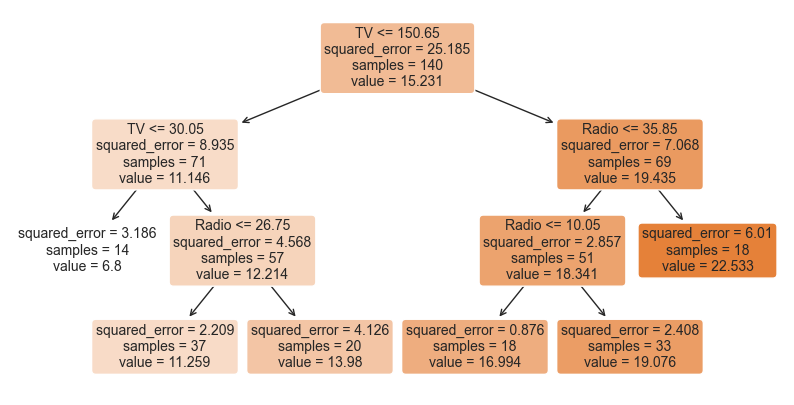

In [42]:
# Plot Tree 
fig = plt.figure(figsize=(10,5))
tree.plot_tree( regressorB,
                feature_names=X_train2.columns,                
                filled=True,   
                rounded=True,                 
                );

### Regression Tree Model C

We will create a tree model with the default parameters.

In [43]:
regressorC = tree.DecisionTreeRegressor(random_state=0) 
regressorC.fit(X_train2, y_train2)
print('    R² = %.3f' %regressorC.score(X_test2, y_test2))

    R² = 0.902


In [44]:
# Prediction 
data_train2['y_predC']=regressorC.predict(X_train2)
data_test2['y_predC' ]=regressorC.predict(X_test2)
data_test2.head()

,TV,Radio,Newspaper,Sales,y_predA,y_predB,y_predC
150,280.7,13.9,37.0,16.1,19.1375,19.075758,21.4
28,248.8,27.1,22.9,18.9,19.1375,19.075758,20.9
13,97.5,7.6,7.2,13.7,11.3680,11.259459,11.5
178,276.7,2.3,23.7,16.8,19.1375,16.994444,17.7
109,255.4,26.9,5.5,19.8,19.1375,19.075758,20.9


In [45]:
# Getting the tree max depth
regressorC.tree_.max_depth

14

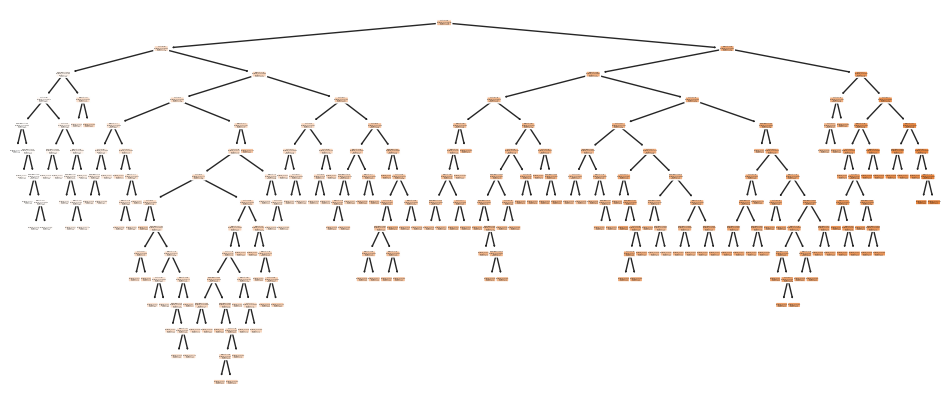

In [46]:
# Plotting the tree model
fig = plt.figure(figsize=(12,5))
tree.plot_tree( regressorC,
                feature_names=X_train2.columns,
                filled=True,                
                rounded=True,                 
                );

What did you understand? The tree is too big to be represented in a single, understandable graphic.

### Model comparisons

In [47]:
# Computing R² on Testing Sets
print('Regression Tree --- Testing Set ---   ')
print('Model A   R² = %.3f' %(r2_score(data_test2.Sales, data_test2.y_predA)))
print('Model B   R² = %.3f' %(r2_score(data_test2.Sales, data_test2.y_predB)))
print('Model C   R² = %.3f' %(r2_score(data_test2.Sales, data_test2.y_predC)))

Regression Tree --- Testing Set ---   
Model A   R² = 0.857
Model B   R² = 0.871
Model C   R² = 0.902


The R² values for the testing set indicate that Model C has the highest goodness of fit (0.902), followed by Model B (0.871), and then Model A (0.857). This suggests that Model C explains the most variance in the target variable among the three models.

In [48]:
# Computing RMSE on Testing Sets
print('Regression Tree --- Testing Set ---   ')
print('Model A   RMSE = %.3f' %(root_mean_squared_error(data_test2.Sales, data_test2.y_predA)))
print('Model B   RMSE = %.3f' %(root_mean_squared_error(data_test2.Sales, data_test2.y_predB)))
print('Model C   RMSE = %.3f' %(root_mean_squared_error(data_test2.Sales, data_test2.y_predC)))

Regression Tree --- Testing Set ---   
Model A   RMSE = 2.200
Model B   RMSE = 2.088
Model C   RMSE = 1.817


 Among the three regression tree models evaluated on the testing set, Model C has the lowest Root Mean Squared Error (RMSE) (1.817), indicating better predictive accuracy compared to Model A (RMSE = 2.200) and Model B (RMSE = 2.088). 


Remember when selecting a model, various factors, such as tree complexity, overfitting, interpretability, and computational efficiency, must be considered to ensure the best trade-off between performance and practicality. 

## Conclusions

Key Takeaways:
- Decision trees model non-linear relationships, but the choice of tree depth and node criteria (like minimum samples per leaf) significantly affects their accuracy and generalization.
- Simple trees (low depth) may underfit, exhibiting poor R² scores, especially on test datasets, indicating limited adaptability.
- Increasing tree depth improves training accuracy but may lead to overfitting, demonstrated by discrepancies between training and testing performance.
- Optimal tree complexity depends on balancing detail and simplicity to prevent overfitting while maintaining good predictive power.
- In practical scenarios, such as the advertising dataset, decision trees helped illustrate how different features (TV, Radio, Newspaper) predict sales with more complex models. However, managing tree complexity remains crucial to build robust models.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
- https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5